Download all important import

**Flower Classification using Transfer Learning**
There are millions of beautiful flowers bursting around every corner, & we've been constantly awed by the beauty & uniqueness of each flower. Classifying different flowers from one another is indeed a challenging task, as there's a plethora of flowers to classify & flowers can appear similar to each other. However, classifying different flower species will be advantageous in the fields such as the pharmaceutical industry, botany, agricultural, & trade activities, which is why we thought of performing this task.

The main aim of this project is to solve a Supervised Image Classification problem of classifying the flower types - rose, daisy, dandelion, sunflower, & tulip. In the end, we'll have a trained model, which can predict the class of the flower using the Convolutional Neural Networks (CNN).

The dataset consists of 5 classes of flower species - rose, daisy, dandelion, sunflower, & tulip, each having more than 800 images.

This project follows a basic workflow:

Examine and understand data
* Build an input pipeline
* Build the model
* Train the model
* Test the model
Initially, the following libraries were imported to use in the data conversion process:

Here we are going to import necessary libraries:
Matplotlib for data visualization
Numpy to perform array and matrix operations.
Os provides functions for interacting with the operating system.
PIL Python Imaging Library which provides the python interpreter with image editing capabilities.
TensorFlow provides a collection of workflows to develop and train models.
keras is used to make the implementation of neural networks easy.
Sequential the core idea of Sequential API is simply arranging the Keras layers in a sequential order.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential  # Corrected import
from tensorflow.keras.layers import Dense, Flatten, Dropout  # Corrected import
from tensorflow.keras.optimizers import Adam  # Corrected import


2024-03-27 16:12:07.746938: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 16:12:07.747024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 16:12:07.748719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# import pathlib
from pathlib import Path

# dataset_url = link of the dataset
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = Path(data_dir)
     

In [3]:
# print the data_dir
print(data_dir)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/dandelion/1241011700_261ae180ca.jpg


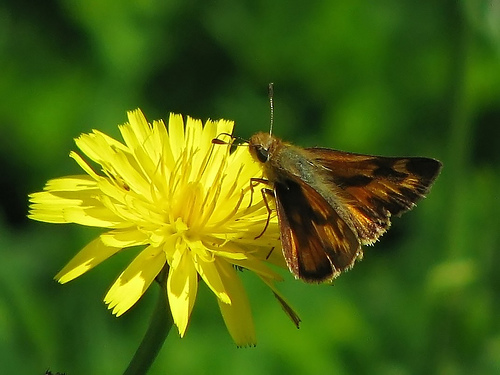

In [4]:

# visualizing the dandelion class

dandelion = list(data_dir.glob('dandelion/*'))
print(dandelion[0])
PIL.Image.open(str(dandelion[0]))

/root/.keras/datasets/flower_photos/tulips/5546723510_39a5a10d3a_n.jpg


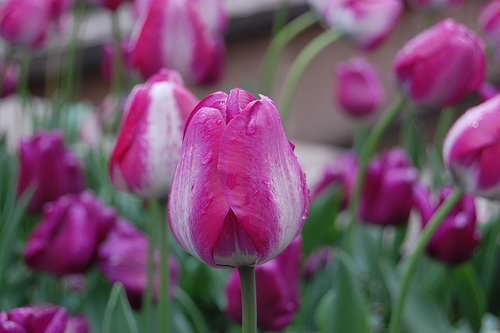

In [5]:
# we will visualize for Tuplips

tulips = list(data_dir.glob('tulips/*'))
print(tulips[3])
PIL.Image.open(str(tulips[0]))

/root/.keras/datasets/flower_photos/daisy/14087947408_9779257411_n.jpg


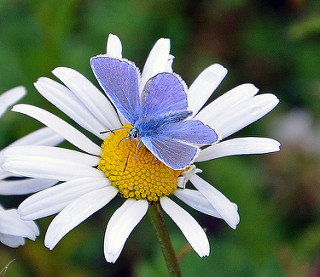

In [6]:

# now we will visualize for Daisy

daisy = list(data_dir.glob('daisy/*'))
print(daisy[0])
PIL.Image.open(str(daisy[0]))

/root/.keras/datasets/flower_photos/roses/8096324039_4db2555490.jpg


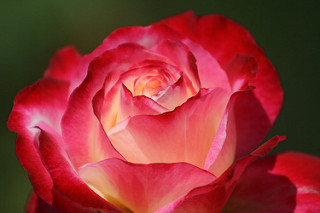

In [7]:

# now we will visualize for Roses

roses = list(data_dir.glob('roses/*'))
print(roses[3])
PIL.Image.open(str(roses[0]))

In [8]:

# take img height and img width as 180
img_height, img_width =180,180

# take batch size as 32
batch_size =32

# Preprocess the training data i.e., train_ds
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode ='categorical',
    validation_split =0.2,
    subset= 'training',
    seed =123,
    image_size=(img_height,img_width),
    batch_size=batch_size
    )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [9]:
# preprocess the validation data i.e., val_ds
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode ='categorical',
    validation_split =0.2,
    subset= 'validation',
    seed =123,
    image_size=(img_height,img_width),
    batch_size=batch_size
    )

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:

# create a variable named class_names which will be equal to trian_ds.class_names
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# print the class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


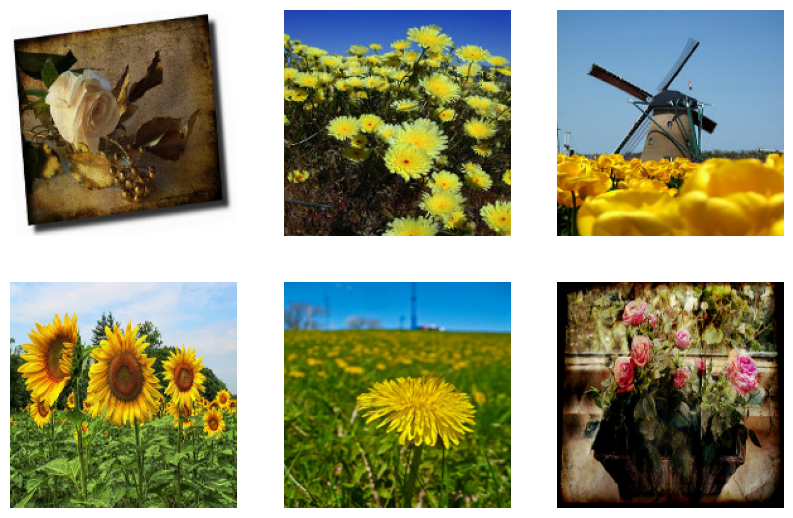

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis('off')

In [12]:
# declare a variable named resnet_model which will be equal to sequential
resnet_model = Sequential()

# use pretrained_model
pretrained_model = keras.applications.ResNet50(include_top=False, input_shape=(180,180,3), pooling='avg',
                                                classes=5, weights='imagenet')


for layer in pretrained_model.layers:
        layer.trainable =False

resnet_model.add(pretrained_model)

In [13]:
# add flatten
resnet_model.add(Flatten())

# add a Dense layer of 512 neurons and give activation as 'relu'
resnet_model.add(Dense(512, activation='relu'))

# add a dense layer of 5 neurons and give activation as 'softmax'
resnet_model.add(Dense(5, activation='softmax'))

In [14]:

# call the summary attribute of the model
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [15]:
# compile the model with Adam(lr=0.001) optimizer, use categorical_crossentropy as loss, and metrics will be equal to accuracy
resnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])    

In [16]:
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)
# train upto 10 epochs
# fit the model in history variable

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.6636 - loss: 1.2408 - val_accuracy: 0.8202 - val_loss: 0.4594
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.8909 - loss: 0.2958 - val_accuracy: 0.8515 - val_loss: 0.3911
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.9356 - loss: 0.1750 - val_accuracy: 0.8665 - val_loss: 0.3925
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.9651 - loss: 0.1098 - val_accuracy: 0.8297 - val_loss: 0.5697
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 231s 3s/step - accuracy: 0.9780 - loss: 0.0796 - val_accuracy: 0.8747 - val_loss: 0.3951
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9936 - loss: 0.0377 - val_accuracy: 0.8760 - val_loss: 0.4233
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.9992 - loss: 0.0159 - val_accuracy: 0.8815 - val_loss: 0.4248
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9995 - loss: 0.0078 - val_accuracy: 0.8747 - v

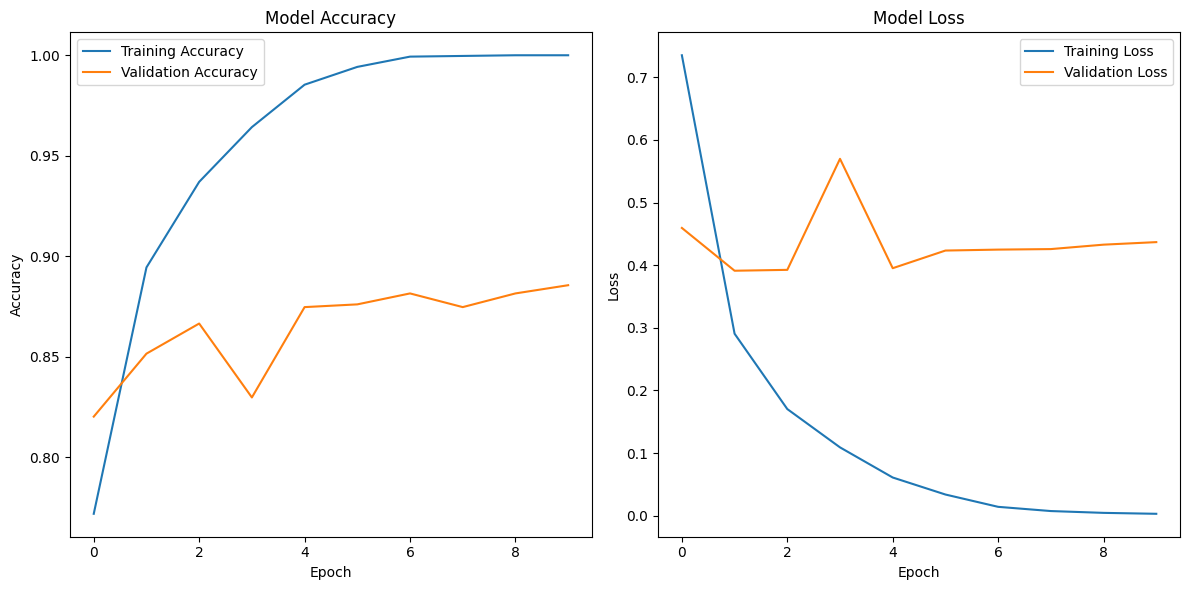

In [17]:
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# declare a variable named resnet_model which will be equal to sequential
model = Sequential()

# use pretrained_model
pretrained_model = keras.applications.ResNet50(include_top=False, pooling='avg',
                                                classes=5, weights='imagenet')


for layer in pretrained_model.layers:
        layer.trainable =False

model.add(pretrained_model)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

resnet2 = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.5865 - loss: 1.4642 - val_accuracy: 0.8501 - val_loss: 0.4085
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.8082 - loss: 0.5104 - val_accuracy: 0.8556 - val_loss: 0.3896
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.8461 - loss: 0.4240 - val_accuracy: 0.8828 - val_loss: 0.3499
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.8734 - loss: 0.3480 - val_accuracy: 0.8774 - val_loss: 0.3381
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.8753 - loss: 0.3428 - val_accuracy: 0.8733 - val_loss: 0.3252
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.8958 - loss: 0.2744 - val_accuracy: 0.8842 - val_loss: 0.3255
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.9110 - loss: 0.2396 - val_accuracy: 0.8828 - val_loss: 0.3411
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9211 - loss: 0.2153 - val_accuracy: 0.8760 - v

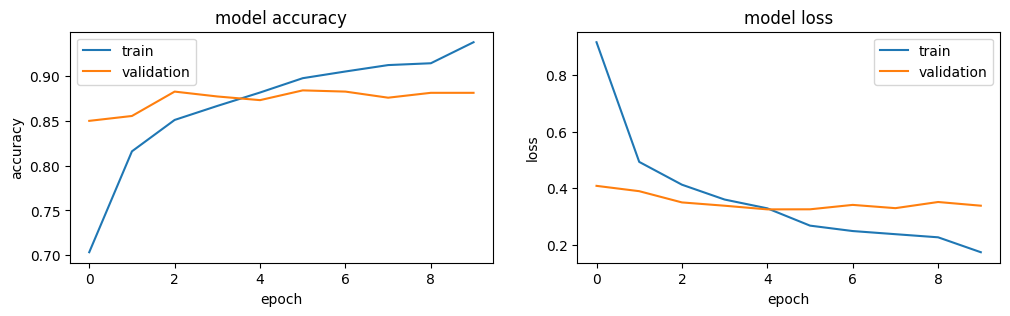

In [20]:
plt.figure(1, figsize = (12,3))

plt.subplot(121)
plt.plot(resnet2.history['accuracy'])
plt.plot(resnet2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.subplot(122)
plt.plot(resnet2.history['loss'])
plt.plot(resnet2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()

**Conclusion**:
we embarked on a journey to classify flower species using Transfer Learning with Convolutional Neural Networks (CNNs). Here's a summary of our workflow:

1. **Data Examination:** We started by examining the dataset, which consisted of five classes of flower species: rose, daisy, dandelion, sunflower, and tulip. Each class contained more than 800 images.

2. **Input Pipeline:** We built an input pipeline to preprocess the image data, including resizing, normalization, and augmentation.

3. **Model Building:** Utilizing Transfer Learning, we employed a pre-trained CNN model (such as ResNet or MobileNet) as the base model and added a few additional layers on top for fine-tuning. This allowed us to leverage the pre-trained model's learned features while adapting to our specific task.

4. **Model Training:** We trained our model on the training data while validating its performance on the validation set. We compiled the model with appropriate loss function, optimizer, and metrics and trained it for several epochs.

5. **Model Evaluation:** After training, we evaluated the model's performance on the test set to assess its generalization ability. We visualized the model's accuracy and loss over epochs to understand its training progress.

Throughout this project, we harnessed the power of deep learning to classify flower species accurately. Such models have vast applications in various domains, including agriculture, botany, and pharmaceuticals. By continuing to refine and optimize our models, we can unlock even more insights from image data and contribute to solving real-world challenges.